## Necessary Imports

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import wandb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import matplotlib
import seaborn as sns

In [ ]:
!wandb login f63b589f2c31fd6562d752168e172d22870ab562

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## question 1


In [ ]:
wandb.init(project='DL-Assignment-1',name='Ques : 1')

wandb: Currently logged in as: cs23m015. Use `wandb login --relogin` to force relogin


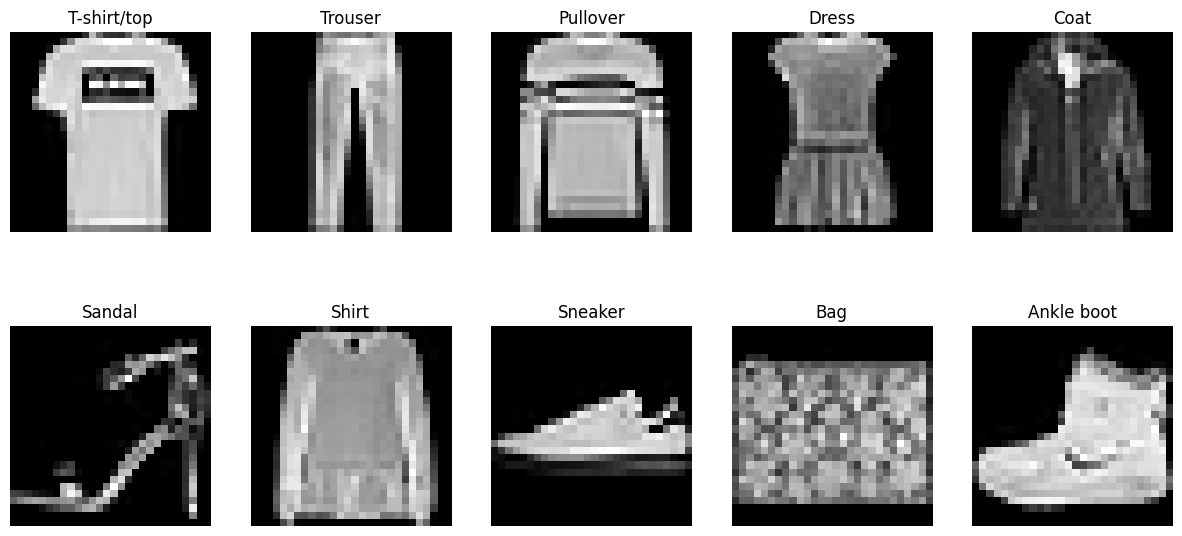

In [ ]:
# Load the Fashion MNIST dataset
(train_images, train_lables), (test_images, test_lables) = fashion_mnist.load_data()

# Define class names corresponding to the 10 categories in the Fashion MNIST dataset
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

#For each class potting one sample image
plt.figure(figsize=(15,7))

images_plot=[]
# Loop through each class label and plot the first image in the training set for that class
i=0
while i< len(class_names):
    # Discover the position of first occurence of class in dataset
    index = np.argmax(train_lables==i)

    # Ploting image for present class
    plt.subplot(2,5,i+1)  # No of rows=2 , No of colomns = 5 for 10 classes
    plt.imshow(train_images[index], cmap='gray')
    plt.title(class_names[i])  # Put the title to the class name
    plt.axis('off')  # Switch off the  axis lables for better visualization
    images_plot.append(wandb.Image(train_images[index], caption=class_names[i]))
    i+=1
# wandb.log({'Question1':images_plot})

# Shows figure with plotted images
plt.show()
wandb.finish()

## NeuralNetwork

In [ ]:
dataset = 'fashion_mnist'
if dataset == 'fashion_mnist':
  (x1, y1), (x2, y2) = fashion_mnist.load_data()
elif dataset== 'mnist':
  (x1, y1), (x2, y2) = mnist.load_data()

x1=x1.reshape(x1.shape[0],-1) / 255
x2=x2.reshape(x2.shape[0],-1)/ 255

x1, x_val, y1, y_val = train_test_split(x1,y1, test_size=0.1, random_state=0)

class NeuralNetwork:
    def __init__(self):

        self.w,self.b,self.a,self.h,self.wd,self.ad,self.hd,self.bd=[],[],[],[],[],[],[],[]



    def activations(self,act,k):
        if act=='sigmoid':
            s=1+np.exp(-k)
            return 1/s
        elif act =='relu':
            s=k*(k>0)
            return s
        elif act =='tanh':
            s = np.tanh(k)
            return s
        elif act == 'identity':
            return k
        elif act =='softmax':
            x=np.copy(k)
            i=0
            while i < k.shape[0]:
                add=0
                largi=np.argmax(k[i])
                j=0
                while j< k.shape[1]:
                    add+=np.exp(k[i][j]-k[i][largi])
                    j=j+1
                s=k[i]-k[i][largi]
                k[i]=np.exp(s)/add
                x[i]=k[i]
                i=i+1
            return x


    def activations_derivative(self,act,k):
        if act=='sigmoid':
            s = np.multiply((1/(1+np.exp(-k))),(1-(1/(1+np.exp(-k)))))
            return s
        if act=='relu':
            relu_derivative=0
            relu_derivative=np.maximum(0,k)
            relu_derivative[relu_derivative>0]=1
            return relu_derivative
        if act=='tanh':
            # a=np.exp(k)-np.exp(-k)
            # b=np.exp(k)+np.exp(-k)
            # # x=a/b
            # return 1-np.square(x)
            return 1-np.tanh(k)**2
        if act == 'identity':
            return 1


    def loss_function(self,fn_loss,yhat,y1,mom):
        cac=0
        i=0
        while i<len(self.w):
            s=np.sum(self.w[i]**2)
            cac=cac+s
            i=i+1
        cac=mom*cac
        cac=cac/2
        ch=1
        if fn_loss=='cross_entropy':
            loss=0
            i=0
            while i<y1.shape[0]:
                loss=loss-((np.log2(yhat[i][y1[i]])))
                i=i+1
            s=loss+cac
            z=y1.shape[0]
            return s/z

        elif fn_loss=='mean_square':
            bl=np.zeros((y1.shape[0],yhat.shape[1]))
            i=0
            while i<y1.shape[0]:
                bl[i][y1[i]]=1
                i=i+1
            s=(np.sum(((yhat-bl)**2)))+cac
            t=y1.shape[0]
            return s/t



    def make_layers(self,hidden_layers,neuron,neuron_input,start,classes):

        self.w = []
        self.b = []

        all_layer=[]
        np.random.seed(5)
        all_layer.append(neuron_input)
        i=0
        while i<hidden_layers:
            all_layer.append(neuron)
            i=i+1
        intialization = 0
        all_layer.append(classes)
        # all_layer = [784,128,,,,,10]
        if start=='random':
            i =0
            while i<= hidden_layers:
                # self.b.append(np.random.randn(1,all_layer[i+1]))
                # self.w.append(np.random.randn(all_layer[i],all_layer[i+1]))

                self.b.append(np.random.uniform(-0.5,0.5,(1,all_layer[i+1])))
                self.w.append(np.random.uniform(-0.5,0.5,(all_layer[i],all_layer[i+1])))
                i=i+1
        if start=='xavier':
            i=0
            while i<= hidden_layers:
                self.b.append((np.random.randn(1,all_layer[i+1]))*np.sqrt(6/(1+all_layer[i+1])))
                self.w.append((np.random.randn(all_layer[i],all_layer[i+1]))*np.sqrt(6/(all_layer[i]+all_layer[i+1])))

                # n=np.sqrt(6/(all_layer[i]+all_layer[i+1]))
                # wt=np.random.uniform(-n,n,(all_layer[i],all_layer[i+1]))
                # b=np.random.uniform(-n,n,(1,all_layer[i+1]))
                # self.b.append(b)
                # self.w.append(wt)
                i=i+1

    def forward_pass(self,x,act='sigmoid'):

        self.a,self.h=[],[]
        check=x
        i=0
        while i<len(self.w)-1:
            q1=np.add(np.matmul(check,self.w[i]),self.b[i])
            bool = act=='relu' and i==0
            if (bool):
                j=0
                s=q1.shape[0]
                while j < s:
                    maxi=np.argmax(q1[j])
                    q1[j]/=q1[j][maxi]
                    j=j+1
            r1=self.activations(act,q1)
            check=r1
            self.h.append(r1)
            self.a.append(q1)
            i=i+1
        # print(len(self.w)-1,"check")
        z=len(self.w)-1
        q1=np.add(np.matmul(check,self.w[z]),self.b[z])
        r1=self.activations('softmax',q1)
        self.h.append(r1)
        self.a.append(q1)

        return self.h[-1]



    def backward_pass(self,yhat,y1,x1,classes,activation,fn_loss,mom):
        self.wd,self.bd,self.ad,self.hd=[],[],[],[]
        bl=0
        bl=np.zeros((y1.shape[0],classes))
        i=0
        while i< y1.shape[0]:
            bl[i][y1[i]]=1
            i=i+1

        b=None
        a=None


        if fn_loss=="cross_entropy":
            yhatl=np.zeros((yhat.shape[0],1))
            i=0
            while i< yhat.shape[0]:
                yhatl[i]=yhat[i][y1[i]]
                i=i+1

            b=-1*(bl-yhat)
            a=-1*(bl/yhatl)

            self.hd.append(a)
            self.ad.append(b)

        elif fn_loss=="mean_square":
            s=yhat-bl
            a=2*s
            self.hd.append(a)
            b=[]
            j=0
            while j< yhat.shape[1]:
                r=yhat.shape[0]
                s=yhat.shape[1]
                hot_j=np.zeros((r,s))
                hot_j[:,j]=1
                hat_j=np.ones((r,s))*(yhat[:,j].reshape(r,1))
                l=yhat-bl
                x=hot_j-hat_j
                aj=2*(np.sum((l)*(yhat*(x)),axis=1))
                b.append(aj)
                j=j+1
            self.ad.append(np.array(b).T)



        j = len(self.w)-1
        while j>-1:
            u=self.h[j-1].T
            bool = (j==0)
            if bool:
                u=x1.T
            t=x1.shape[0]
            length=len(self.ad)
            w=np.matmul(u,self.ad[-1])/t
            b=np.sum(self.ad[length-1],axis=0)/t
            if j!=0:
                a=np.matmul(self.ad[length-1],self.w[j].T)
                der=self.activations_derivative(activation,self.a[j-1])
                z=np.multiply(a,der)
                self.hd.append(a)
                self.ad.append(z)
            self.bd.append(b)
            self.wd.append(w)
            j=j-1
        i=0

        while i< len(self.w):
            s=len(self.w)-1-i
            self.wd[s]-=mom*self.w[i]
            i=i+1

    def accuracy(self,x2,y2,act):
        self.forward_pass(x2,act)
        ypred=np.argmax(self.h[len(self.w)-1],axis=1)
        n=0
        l=y2.shape[0]
        i=0
        while i<y2.shape[0]:
            if ypred[i]!=y2[i]:
                n+=+1
            i+=1
        return ((x2.shape[0]-n)/y2.shape[0])*100


    def predict(self,x2,y2,act):
        self.forward_pass(x2,act)
        fut=np.argmax(self.h[len(self.w)-1],axis=1)
        n=0
        i=0
        while i < y2.shape[0]:
            if fut[i]!=y2[i]:
                n+=1
            i+=1

        acc=((x2.shape[0]-n)/y2.shape[0])*100
        print("Test Accuracy: "+str(acc))


    def createBatches(self,x1,y1,size):
        info,res=[],[]
        s=x1.shape[0]
        l=math.ceil(s/size)
        i=0
        while i < l:
            group,group_ans=[],[]
            j=i*size
            s=min((i+1)*size,x1.shape[0])
            while j< s:
                group.append(x1[j])
                group_ans.append(y1[j])
                j+=1
            group_ans=np.array(group_ans)
            group=np.array(group)
            info.append(group)
            res.append(group_ans)
            i+=1
        return info,res


    def onePass(self,x1,y1,classes,lay,rate,act,fn_loss,mom):
        self.forward_pass(x1 ,act)

        self.backward_pass(self.h[lay-1], y1,x1,classes, act,fn_loss,mom)


    def batch(self,x1,y1,lay,epo,count,size,act,fn_ans,mom):
        classes=10
        info,res=self.createBatches(x1,y1,size)

        i=0
        while i < epo:
            h=None
            j=0
            s=len(info)
            while j< s:
                self.onePass(info[j],res[j],classes,lay,count,act,fn_ans,mom)
                k=0
                while k< lay:
                    q=lay-1-k
                    self.w[k]-=count*(self.wd[q])
                    self.b[k]-=count*self.bd[q]
                    k+=1
                j+=1
            i+=1
            self.forward_pass(x1,act)
            loss_train=1
            loss1=self.loss_function(fn_ans,self.h[lay-1],y1,mom)
            self.forward_pass(x_val,act)
            loss2=self.loss_function(fn_ans,self.h[lay-1],y_val,mom)
            acc1=self.accuracy(x1,y1,act)
            acc2=self.accuracy(x_val,y_val,act)

            wandb.log(
                    {
                        'epoch': i,
                        'training_loss' : round(loss1,2),
                        'training_accuracy' : round(acc1,2),
                        'validation_loss' : round(loss2,2),
                        'validation_accuracy':round(acc2,2)
                    }
                )
            print("Iteration Number: "+str(i), end="")
            print(" Train Loss : "+str(loss1))
            print("Iteration Number: "+str(i), end="")
            print(" Validation Loss : "+str(loss2))
            print("Iteration Number: "+str(i), end="")
            print(" Train Accurcy : "+str(acc1))
            print("Iteration Number: "+str(i), end="")
            print(" Validaion Accuracy: "+str(acc2))


    def momentum(self,x1,y1,lay,epo,count,size,eta,act,fn_loss,mom):
        info,res=self.createBatches(x1,y1,size)
        classes=10
        alpha,beta=[],[]
        i=0
        while i< lay:
            a=np.zeros((self.w[i].shape))
            b=np.zeros(self.b[i].shape)
            beta.append(b)
            alpha.append(a)
            i+=1
        i=0
        while i<epo :
            j=0
            while j< len(info):
                self.onePass(info[j],res[j],classes,lay,count,act,fn_loss,mom)
                k=0
                while k < lay:
                    s=lay-1-k
                    alpha[k]=(alpha[k]*eta)+self.wd[s]
                    beta[k]=(beta[k]*eta)+self.bd[s]
                    self.w[k]-=count*alpha[k]
                    self.b[k]-=count*beta[k]
                    k+=1
                j+=1
            i+=1

            self.forward_pass(x1,act)
            loss1=self.loss_function(fn_loss,self.h[lay-1],y1,mom)
            self.forward_pass(x_val,act)
            loss2=self.loss_function(fn_loss,self.h[lay-1],y_val,mom)
            acc1=self.accuracy(x1,y1,act)
            acc2=self.accuracy(x_val,y_val,act)

            wandb.log(
                    {
                        'epoch': i,
                        'training_loss' : round(loss1,2),
                        'training_accuracy' : round(acc1,2),
                        'validation_loss' : round(loss2,2),
                        'validation_accuracy':round(acc2,2)
                    }
                )
            print("Iteration Number: "+str(i), end="")
            print(" Train Loss : "+str(loss1))
            print("Iteration Number: "+str(i), end="")
            print(" Validation Loss : "+str(loss2))
            print("Iteration Number: "+str(i), end="")
            print(" Train Accurcy : "+str(acc1))
            print("Iteration Number: "+str(i), end="")
            print(" Validaion Accuracy: "+str(acc2))


    def nestrov(self,x1,y1,lay,epo,count,size,eta,act,fn_loss,mom):
        classes=10
        info,res=self.createBatches(x1,y1,size)

        alpha,beta=[],[]

        i=0
        while i<lay:
            b=np.zeros((self.b[i].shape))
            a=np.zeros((self.w[i].shape))
            beta.append(b)
            alpha.append(a)
            i+=1

        i=0
        while i< epo:
            j=0
            while j< len(info):
                k=0
                while k < lay:
                    self.b[k]-=eta*beta[k]
                    self.w[k]-=eta*alpha[k]
                    k+=1
                self.onePass(info[j],res[j],classes,lay,count,act,fn_loss,mom)
                k=0
                while k<lay:
                    s=lay-1-k
                    alpha[k]=(eta*alpha[k])+count*(self.wd[s])
                    beta[k]=(eta*beta[k])+count*self.bd[s]
                    self.b[k]-=beta[k]
                    self.w[k]-=alpha[k]
                    k+=1
                j+=1
            i+=1

            self.forward_pass(x1,act)
            s=lay-1
            loss1=self.loss_function(fn_loss,self.h[s],y1,mom)
            self.forward_pass(x_val,act)
            loss2=self.loss_function(fn_loss,self.h[s],y_val,mom)
            acc1=self.accuracy(x1,y1,act)
            acc2=self.accuracy(x_val,y_val,act)
            wandb.log(
                    {
                        'epoch': i,
                        'training_loss' : round(loss1,2),
                        'training_accuracy' : round(acc1,2),
                        'validation_loss' : round(loss2,2),
                        'validation_accuracy':round(acc2,2)
                    }
                )
            print("Iteration Number: "+str(i), end="")
            print(" Train Loss : "+str(loss1))
            print("Iteration Number: "+str(i), end="")
            print(" Validation Loss : "+str(loss2))
            print("Iteration Number: "+str(i), end="")
            print(" Train Accurcy : "+str(acc1))
            print("Iteration Number: "+str(i), end="")
            print(" Validaion Accuracy: "+str(acc2))




    def rmsProp(self,x1,y1,lay,epo,count,size,eta,act,fn_loss,mom,e):
        info,res=self.createBatches(x1,y1,size)
        classes =10
        alpha,beta=[],[]

        i=0
        while i< lay:
            b=np.zeros((self.b[i].shape))
            a=np.zeros((self.w[i].shape))
            beta.append(b)
            alpha.append(a)
            i+=1

        i=0
        while i < int(epo):
            j=0
            while j < len(info):
                self.onePass(info[j],res[j],classes,lay,count,act,fn_loss,mom)
                k=0
                while k < lay:
                    s=lay-1-k
                    q=1-eta
                    alpha[k]=(alpha[k]*eta)+(q)*np.square(self.wd[s])
                    beta[k]=(beta[k]*eta)+(q)*np.square(self.bd[s])
                    self.w[k]-=(count/np.sqrt(np.linalg.norm(alpha[k]+e)))*self.wd[s]
                    self.b[k]-=(count/np.sqrt(np.linalg.norm(beta[k]+e)))*self.bd[s]
                    k+=1
                j+=1
            i+=1

            self.forward_pass(x1,act)
            s=lay-1
            loss1=self.loss_function(fn_loss,self.h[s],y1,mom)
            self.forward_pass(x_val,act)
            loss2=self.loss_function(fn_loss,self.h[s],y_val,mom)
            acc1=self.accuracy(x1,y1,act)
            acc2=self.accuracy(x_val,y_val,act)
            wandb.log(
                    {
                        'epoch': i,
                        'training_loss' : round(loss1,2),
                        'training_accuracy' : round(acc1,2),
                        'validation_loss' : round(loss2,2),
                        'validation_accuracy':round(acc2,2)
                    }
                )
            # print("Iteration Number: "+str(i), end="")
            # print(" Train Loss : "+str(loss1))
            # print("Iteration Number: "+str(i), end="")
            # print(" Validation Loss : "+str(loss2))
            # print("Iteration Number: "+str(i), end="")
            # print(" Train Accurcy : "+str(acc1))
            # print("Iteration Number: "+str(i), end="")
            # print(" Validaion Accuracy: "+str(acc2))


    def adam(self,x1,y1,lay,epo,count,size,eta1,eta2,act,fn_loss,e,mom):
        info,res=self.createBatches(x1,y1,size)
        classes=10
        w1,w2,b1,b2=[],[],[],[]

        i=0
        while i< lay:
            b=np.zeros((self.w[i].shape))
            a=np.zeros((self.w[i].shape))
            w2.append(b)
            w1.append(a)
            b=np.zeros((self.b[i].shape))
            a=np.zeros((self.b[i].shape))
            b1.append(a)
            b2.append(b)
            i+=1

        a=0
        i = 0
        while i < int(epo):
            j=0
            while j< len(info):
                a=a+1
                self.onePass(info[j],res[j],classes,lay,count,act,fn_loss,mom)
                k=0
                while k< lay:
                    r=1-eta1
                    p=1-eta2
                    u=1-eta1**a
                    v=1-eta2**a
                    s=lay-1-k

                    w1[k]=(w1[k]*eta1)+(r)*self.wd[s]
                    mwhat=w1[k]/(u)

                    w2[k]=(w2[k]*eta2)+(p)*np.square(self.wd[s])
                    vwhat=w2[k]/(v)

                    b1[k]=(b1[k]*eta1)+(r)*self.bd[s]
                    mbhat=b1[k]/(u)

                    b2[k]=(b2[k]*eta2)+(p)*np.square(self.bd[s])
                    vbhat=b2[k]/(v)

                    self.w[k]-=(count/np.sqrt(vwhat+e))*mwhat
                    self.b[k]-=(count/np.sqrt(vbhat+e))*mbhat
                    k+=1
                j+=1
            i=i+1
            self.forward_pass(x1, act)
            s=lay-1
            loss1=self.loss_function(fn_loss,self.h[s],y1,mom)
            self.forward_pass(x_val,act)
            loss2=self.loss_function(fn_loss,self.h[s],y_val,mom)
            acc1=self.accuracy(x1,y1,act)
            acc2=self.accuracy(x_val,y_val,act)
            wandb.log(
                    {
                        'epoch': i,
                        'training_loss' : round(loss1,2),
                        'training_accuracy' : round(acc1,2),
                        'validation_loss' : round(loss2,2),
                        'validation_accuracy':round(acc2,2)
                    }
                )
            # print("Iteration Number: "+str(i), end="")
            # print(" Train Loss : "+str(loss1))
            # print("Iteration Number: "+str(i), end="")
            # print(" Validation Loss : "+str(loss2))
            # print("Iteration Number: "+str(i), end="")
            # print(" Train Accurcy : "+str(acc1))
            # print("Iteration Number: "+str(i), end="")
            # print(" Validaion Accuracy: "+str(acc2))


    def Nadam(self,x1,y1,lay,epo,count,size,eta1,eta2,act,fn_loss,e,mom):
        classes=10
        w1,w2,b1,b2=[],[],[],[]
        info,res=self.createBatches(x1,y1,size)

        for i in range(lay):
            b=np.zeros((self.w[i].shape))
            a=np.zeros((self.w[i].shape))
            w2.append(b)
            w1.append(a)
            b=np.zeros((self.b[i].shape))
            a=np.zeros((self.b[i].shape))
            b1.append(a)
            b2.append(b)

        a=0
        i=0
        while i< int(epo):
            j=0
            while j< len(info):
                a=a+1
                self.onePass(info[j],res[j],classes,lay,count,act,fn_loss,mom)
                k=0
                while k < lay:
                    r=1-eta1
                    p=1-eta2
                    u=1-eta1**a
                    v=1-eta2**a
                    s=lay-1-k
                    w1[k]=(w1[k]*eta1)+(r)*self.wd[s]
                    mwhat=w1[k]/(u)

                    w2[k]=(w2[k]*eta2)+(p)*np.square(self.wd[s])
                    vwhat=w2[k]/(v)

                    b1[k]=(b1[k]*eta1)+(r)*self.bd[s]
                    mbhat=b1[k]/(u)

                    b2[k]=(b2[k]*eta2)+(p)*np.square(self.bd[s])
                    vbhat=b2[k]/(v)

                    self.w[k]-=(count/np.sqrt(vwhat+e))*(eta1*mwhat+(((r)*self.wd[s])/(u)))
                    self.b[k]-=(count/np.sqrt(vbhat+e))*(eta1*mbhat+(((r)*self.bd[s])/(u)))
                    k=k+1
                j=j+1
            i=i+1
            self.forward_pass(x1,act)
            s=lay-1
            loss1=self.loss_function(fn_loss ,self.h[s],y1,mom)
            self.forward_pass(x_val ,act)
            loss2=self.loss_function(fn_loss,self.h[s], y_val,mom)
            acc1=self.accuracy(x1 ,y1 ,act)
            acc2=self.accuracy(x_val ,y_val,act)
            wandb.log(
                    {
                        'epoch': i,
                        'training_loss' : round(loss1,2),
                        'training_accuracy' : round(acc1,2),
                        'validation_loss' : round(loss2,2),
                        'validation_accuracy':round(acc2,2)
                    }
                )
            print("Iteration Number: "+str(i), end="")
            print(" Train Loss : "+str(loss1))
            print("Iteration Number: "+str(i), end="")
            print(" Validation Loss : "+str(loss2))
            print("Iteration Number: "+str(i), end="")
            print(" Train Accurcy : "+str(acc1))
            print("Iteration Number: "+str(i), end="")
            print(" Validaion Accuracy: "+str(acc2))



    def architecture(self,x1,y1,x2,y2,hiddenlayers,neuron,input_neuron,batch,initialization,fn_loss,activation,optimizer,n,iter,beta,beta1,beta2,e,alpha,mom):
        # self.w,self.b=[],[]
        self.make_layers(hiddenlayers,neuron,input_neuron,initialization,10)
        # print(len(self.w),"arch")
        if optimizer=="batch":
            self.batch(x1,y1,len(self.w),iter,n,batch,activation,fn_loss,alpha)
        elif optimizer=='momentum':
            self.momentum(x1,y1,len(self.w),iter,n,batch,mom,activation,fn_loss,alpha)
        elif optimizer=='nestrov':
            self.nestrov(x1,y1,len(self.w),iter,n,batch,beta,activation,fn_loss,alpha)
        elif optimizer=='rmsProp':
            self.rmsProp(x1,y1,len(self.w),iter,n,batch,beta,activation,fn_loss,alpha,e)
        elif optimizer=='adam':
            self.adam(x1,y1,len(self.w),iter,n,batch,beta1,beta2,activation,fn_loss,e,alpha)
        elif optimizer=='Nadam':
            self.Nadam(x1,y1,len(self.w),iter,n,batch,beta1,beta2,activation,fn_loss,e,alpha)




## Ques :2

In [ ]:
obj = NeuralNetwork()
obj.make_layers(4,64,784,'xavier',10)
y_preds = obj.forward_pass(x2[1],act='tanh')
print("predicted values ->",y_preds)

predicted values -> [[0.20352987 0.38565164 0.00232868 0.12472704 0.00587771 0.01696653
  0.07192139 0.01676011 0.16570118 0.00653585]]


## Ques : 3

In [ ]:
wandb.init(project="DL-Assignment-1")
# obj=NeuralNetwork()
# obj.architecture(x1,
#                  y1,
#                  x_val,
#                  y_val,
#                  hiddenlayers=3,
#                  neuron=128,
#                  input_neuron=784,
#                  batch=32,
#                  initialization="random",
#                  fn_loss="mean_square",
#                  activation="tanh",
#                  optimizer="Nadam",
#                  n=0.001,
#                  iter=3,
#                  beta=0.9,
#                  beta1=0.999,
#                  beta2=0.999,
#                  e=1e-8,
#                  alpha=0,
#                  mom=0.9)
# obj.predict(x2,y2,act="tanh")
# wandb.finish()

## Ques 4

In [ ]:
sweep_config = {
            'name': 'sweep 1 : random',
            'method': 'random',
            'metric': { 'goal': 'maximize','name': 'Accuracy'},
            'parameters':
                {
                    # 'dataset' : {'values': ['fashion_mnist']}, # 'fashion_mnist', 'mnist'
                    'iter': {'values': [5,10]},
                    'batch': {'values': [32,64]},
                    'fn_loss': {'values': ['cross_entropy', 'mean_square']}, # 'mean_squared_error', 'cross_entropy'
                    'optimizer': {'values': ['batch', 'momentum', 'nestrov', 'rmsProp', 'adam', 'Nadam']}, # 'sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam'
                    'n' : {'values': [1e-3, 1e-4]},
                    'mom' : {'values': [0.9,0.5]},
                    'beta' : {'values': [0.9,0.5]},
                    'beta1' : {'values': [0.999]},
                    'beta2' : {'values': [0.999]},
                    'e' : {'values': [1e-6]},
                    'alpha': {'values': [0,0.0005]},
                    'initialization': {'values': ['random','xavier']}, # 'random', 'Xavier'
                    'hiddenlayers': {'values': [3, 4, 5]},
                    'neuron': {'values': [32, 64, 128]},
                    'activation': {'values': ['identity', 'sigmoid','tanh', 'relu']}, # 'identity', 'sigmoid', 'tanh', 'ReLU'
                    'outAct': {'values': ['softmax']}
                }
            }



def train():
    #init-classinit , config - param_copy
    init = wandb.init(project='DL-Assignment-1')
    config = init.config
    wandb.run.name = (
        'o:' + config.optimizer +
        '_a:' + config.activation +
        '_ep:' + str(config.iter) +
        '_l:' + config.fn_loss +
        '_i:' + config.initialization +
        '_hl:' + str(config.hiddenlayers) +
        '_hls:' + str(config.neuron)
    )
    obj=NeuralNetwork()
    obj.architecture(x1,
                    y1,
                    x_val,
                    y_val,
                    hiddenlayers=config.hiddenlayers,
                    neuron=config.neuron,
                    input_neuron=784,
                    batch=config.batch,
                    initialization=config.initialization,
                    fn_loss=config.fn_loss,
                    activation=config.activation,
                    optimizer=config.optimizer,
                    n=config.n,
                    iter=config.iter,
                    beta=config.beta,
                    beta1=config.beta1,
                    beta2=config.beta2,
                    e=config.e,
                    alpha=config.alpha,
                    mom=config.mom)

    val_acc = obj.accuracy(x_val,y_val,config.activation)
    wandb.log({'Accuracy': val_acc})




# sweep_id = wandb.sweep(sweep_config, project='DL-Assignment-1')
# wandb.agent(sweep_id, train, count = 300)
# wandb.finish()





## Ques 7

In [ ]:
wandb.init(project='DL-Assignment-1')
obj=NeuralNetwork()
obj.architecture(x1,
                 y1,
                 x_val,
                 y_val,
                 hiddenlayers=4,
                 neuron=128,
                 input_neuron=784,
                 batch=32,
                 initialization="xavier",
                 fn_loss="cross_entropy",
                 activation="tanh",
                 optimizer="Nadam",
                 n=0.0005,
                 iter=10,
                 beta=0.9,
                 beta1=0.999,
                 beta2=0.999,
                 e=1e-8,
                 alpha=0,
                 mom=0.9)





Iteration Number: 1 Train Loss : 0.5637975557781287
Iteration Number: 1 Validation Loss : 0.5722831418591378
Iteration Number: 1 Train Accurcy : 85.56851851851852
Iteration Number: 1 Validaion Accuracy: 85.51666666666667
Iteration Number: 2 Train Loss : 0.4811285063821223
Iteration Number: 2 Validation Loss : 0.5041124093485424
Iteration Number: 2 Train Accurcy : 87.6462962962963
Iteration Number: 2 Validaion Accuracy: 87.51666666666667
Iteration Number: 3 Train Loss : 0.4467892228077329
Iteration Number: 3 Validation Loss : 0.4930495006465213
Iteration Number: 3 Train Accurcy : 88.74444444444445
Iteration Number: 3 Validaion Accuracy: 87.9
Iteration Number: 4 Train Loss : 0.45742699469167786
Iteration Number: 4 Validation Loss : 0.528399768687431
Iteration Number: 4 Train Accurcy : 88.38148148148149
Iteration Number: 4 Validaion Accuracy: 87.15
Iteration Number: 5 Train Loss : 0.43743633448078056
Iteration Number: 5 Validation Loss : 0.5131577827959475
Iteration Number: 5 Train Accurc

In [ ]:
y_preds=[]
for i in range (len(x2)):
  y_preds.append(obj.forward_pass(x2[i],act='tanh'))

y_OH_test = np.eye(10)[y2]

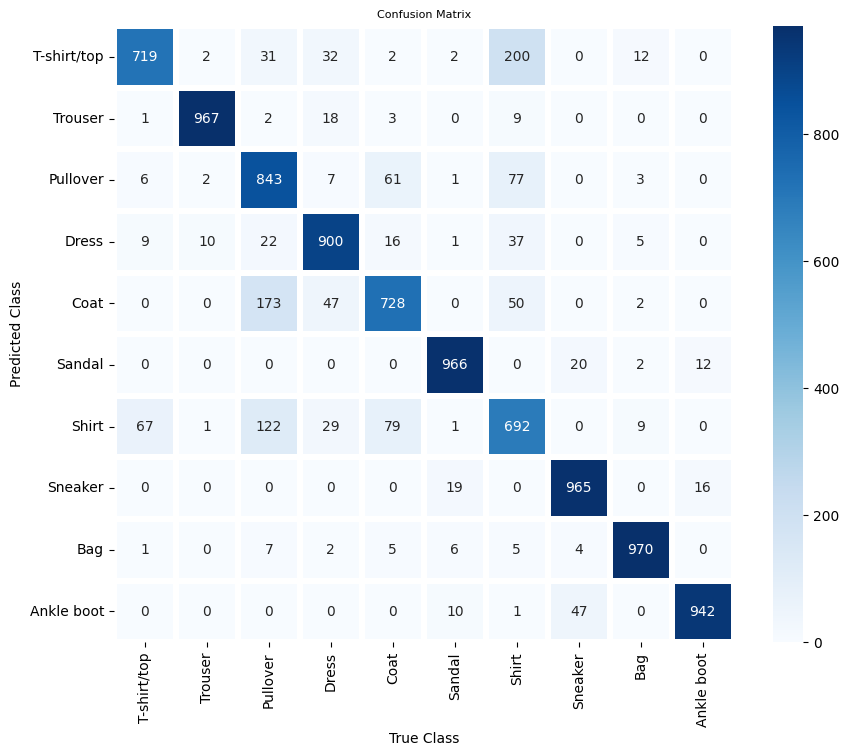

In [ ]:
class_label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
wandb.init(project="DL-Assignment-1", name="Ques 7")
df_conf_matrix = pd.DataFrame(confusion_matrix(np.argmax(y_OH_test,1) , np.argmax(np.array(y_preds).squeeze(),1)))
plt.figure(figsize=(10, 8))
axis = sns.heatmap(df_conf_matrix, annot=True,  cmap= 'Blues', fmt='d',linewidths=3, linecolor='white')
axis.set_xticklabels(class_label,rotation=90)
axis.set_yticklabels(class_label,rotation=0)
plt.title('Confusion Matrix', fontsize=8)
plt.ylabel("Predicted Class")
plt.xlabel("True Class")
wandb.log({"Confusion_Matrix": wandb.Image(plt)})
plt.show()
wandb.finish()

## Ques 8

In [ ]:
sweep_config = {
            'name': 'sweep 2 : ce vs mse',
            'method': 'grid',
            'metric': { 'goal': 'maximize','name': 'Accuracy'},
            'parameters':
                {
                    # 'dataset' : {'values': ['fashion_mnist']}, # 'fashion_mnist', 'mnist'
                    'iter': {'values': [10]},
                    'batch': {'values': [64]},
                    'fn_loss': {'values': ['cross_entropy', 'mean_square']}, # 'mean_squared_error', 'cross_entropy'
                    'optimizer': {'values': ['batch', 'momentum', 'nestrov', 'rmsProp', 'adam', 'Nadam']}, # 'sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam'
                    'n' : {'values': [1e-3, 1e-4]},
                    'mom' : {'values': [0.9]},
                    'beta' : {'values': [0.9]},
                    'beta1' : {'values': [0.999]},
                    'beta2' : {'values': [0.999]},
                    'e' : {'values': [1e-6]},
                    'alpha': {'values': [0]},
                    'initialization': {'values': ['xavier']}, # 'random', 'Xavier'
                    'hiddenlayers': {'values': [4, 5]},
                    'neuron': {'values': [32, 64]},
                    'activation': {'values': ['tanh', 'relu']}, # 'identity', 'sigmoid', 'tanh', 'ReLU'
                    'outAct': {'values': ['softmax']}
                }
            }



def train():
    #init-classinit , config - param_copy
    init = wandb.init(project='DL-Assignment-1')
    config = init.config
    wandb.run.name = (
        'o:' + config.optimizer +
        '_a:' + config.activation +
        '_ep:' + str(config.iter) +
        '_l:' + config.fn_loss +
        '_i:' + config.initialization +
        '_hl:' + str(config.hiddenlayers) +
        '_hls:' + str(config.neuron)
    )
    obj=NeuralNetwork()
    obj.architecture(x1,
                    y1,
                    x_val,
                    y_val,
                    hiddenlayers=config.hiddenlayers,
                    neuron=config.neuron,
                    input_neuron=784,
                    batch=config.batch,
                    initialization=config.initialization,
                    fn_loss=config.fn_loss,
                    activation=config.activation,
                    optimizer=config.optimizer,
                    n=config.n,
                    iter=config.iter,
                    beta=config.beta,
                    beta1=config.beta1,
                    beta2=config.beta2,
                    e=config.e,
                    alpha=config.alpha,
                    mom=config.mom)

    val_acc = obj.accuracy(x_val,y_val,config.activation)
    wandb.log({'Accuracy': val_acc})




# sweep_id = wandb.sweep(sweep_config, project='DL-Assignment-1')
# wandb.agent(sweep_id, train, count = 300)
# wandb.finish()





## Ques 10

In [ ]:
(x1, y1), (x2, y2) = mnist.load_data()

x1=x1.reshape(x1.shape[0],-1) / 255
x2=x2.reshape(x2.shape[0],-1)/ 255

x1, x_val, y1, y_val = train_test_split(x1,y1, test_size=0.1, random_state=0)

# obj=NeuralNetwork()
# obj.architecture(x1,
#                  y1,
#                  x_val,
#                  y_val,
#                  hiddenlayers=4, # 4 ,5
#                  neuron=128, # 64,128
#                  input_neuron=784,
#                  batch=32, # 32,64
#                  initialization="xavier",
#                  fn_loss="cross_entropy",
#                  activation="tanh", # tanh relu
#                  optimizer="Nadam", # N,A,Rms
#                  n=0.0005,
#                  iter=10,
#                  beta=0.9,
#                  beta1=0.999,
#                  beta2=0.999,
#                  e=1e-8,
#                  alpha=0,
#                  mom=0.9)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
sweep_config = {
            'name': 'sweep 3 : mnist dataset',
            'method': 'grid',
            'metric': { 'goal': 'maximize','name': 'Accuracy'},
            'parameters':
                {
                    # 'dataset' : {'values': ['fashion_mnist']}, # 'fashion_mnist', 'mnist'
                    'iter' : {'values': [10]},
                    'batch' : {'values': [32,64]},
                    'fn_loss' : {'values': ['cross_entropy']}, # 'mean_squared_error', 'cross_entropy'
                    'optimizer' : {'values': ['rmsProp', 'adam', 'Nadam']}, # 'sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam'
                    'n' : {'values': [1e-3, 1e-4]},
                    'mom' : {'values': [0.9]},
                    'beta' : {'values': [0.9]},
                    'beta1' : {'values': [0.999]},
                    'beta2' : {'values': [0.999]},
                    'e' : {'values': [1e-6]},
                    'alpha' : {'values': [0]},
                    'initialization' : {'values': ['xavier']}, # 'random', 'Xavier'
                    'hiddenlayers' : {'values': [4]},
                    'neuron' : {'values': [32, 64]},
                    'activation' : {'values': ['tanh', 'relu']}, # 'identity', 'sigmoid', 'tanh', 'ReLU'
                    'outAct' : {'values': ['softmax']}
                }
            }



def train():
    #init-classinit , config - param_copy
    init = wandb.init(project='DL-Assignment-1')
    config = init.config
    wandb.run.name = (
        'o:' + config.optimizer +
        '_a:' + config.activation +
        '_ep:' + str(config.iter) +
        '_l:' + config.fn_loss +
        '_i:' + config.initialization +
        '_hl:' + str(config.hiddenlayers) +
        '_hls:' + str(config.neuron)
    )
    obj=NeuralNetwork()
    obj.architecture(x1,
                    y1,
                    x_val,
                    y_val,
                    hiddenlayers=config.hiddenlayers,
                    neuron=config.neuron,
                    input_neuron=784,
                    batch=config.batch,
                    initialization=config.initialization,
                    fn_loss=config.fn_loss,
                    activation=config.activation,
                    optimizer=config.optimizer,
                    n=config.n,
                    iter=config.iter,
                    beta=config.beta,
                    beta1=config.beta1,
                    beta2=config.beta2,
                    e=config.e,
                    alpha=config.alpha,
                    mom=config.mom)

    val_acc = obj.accuracy(x_val,y_val,config.activation)
    wandb.log({'Accuracy': val_acc})




sweep_id = wandb.sweep(sweep_config, project='DL-Assignment-1')
wandb.agent(sweep_id, train, count = 300)
wandb.finish()





Create sweep with ID: lfeqafjm
Sweep URL: https://wandb.ai/cs23m015/DL-Assignment-1/sweeps/lfeqafjm


wandb: Agent Starting Run: 8b7pr6e5 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▅▆▇▇▇███
validation_loss,█▅▃▃▂▂▂▁▁▁
Accuracy,94.75
epoch,10
training_accuracy,95.71
training_loss,0.21
validation_accuracy,94.75


wandb: Agent Starting Run: z8al68jb with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▇▇█▆▇█▇
training_loss,█▅▃▂▂▁▃▂▁▂
validation_accuracy,▁▅▆▇▇█▆▇▇▆
validation_loss,█▃▃▁▁▁▃▂▁▂
Accuracy,94.55
epoch,10
training_accuracy,96.41
training_loss,0.17
validation_accuracy,94.55


wandb: Agent Starting Run: 7q3ebbbq with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.3781627024077934
Iteration Number: 1 Validation Loss : 0.38347303731717525
Iteration Number: 1 Train Accurcy : 92.27037037037037
Iteration Number: 1 Validaion Accuracy: 92.16666666666666
Iteration Number: 2 Train Loss : 0.2759082958766159
Iteration Number: 2 Validation Loss : 0.3008949022267775
Iteration Number: 2 Train Accurcy : 94.27777777777779
Iteration Number: 2 Validaion Accuracy: 93.88333333333333
Iteration Number: 3 Train Loss : 0.23072069464589776
Iteration Number: 3 Validation Loss : 0.26957408798943255
Iteration Number: 3 Train Accurcy : 95.27592592592593
Iteration Number: 3 Validaion Accuracy: 94.53333333333333
Iteration Number: 4 Train Loss : 0.20210561896383775
Iteration Number: 4 Validation Loss : 0.2520434188646946
Iteration Number: 4 Train Accurcy : 95.87592592592593
Iteration Number: 4 Validaion Accuracy: 94.98333333333333
Iteration Number: 5 Train Loss : 0.17298430319572916
Iteration Number: 5 Validation Loss : 0.23852772532039776
I

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇▇██
training_loss,█▅▄▃▂▂▂▂▂▁
validation_accuracy,▁▅▆▇█▇▇▇██
validation_loss,█▄▃▂▁▁▁▁▁▁
Accuracy,95.46667
epoch,10
training_accuracy,97.27
training_loss,0.13
validation_accuracy,95.47


wandb: Agent Starting Run: j9vzhcgs with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇███
training_loss,█▅▄▃▃▂▂▁▁▁
validation_accuracy,▁▄▅▆▇▇▇███
validation_loss,█▅▄▃▂▂▁▁▁▁
Accuracy,96.2
epoch,10
training_accuracy,97.09
training_loss,0.15
validation_accuracy,96.2


wandb: Agent Starting Run: wjh6rshd with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▇▇▇██▇▆
training_loss,█▅▄▂▂▂▁▁▂▂
validation_accuracy,▁▅▆█▇▇███▇
validation_loss,█▄▃▂▂▂▁▂▂▄
Accuracy,95.85
epoch,10
training_accuracy,97.15
training_loss,0.13
validation_accuracy,95.85


wandb: Agent Starting Run: fjc6zfyv with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.2565444472025093
Iteration Number: 1 Validation Loss : 0.26244759850040306
Iteration Number: 1 Train Accurcy : 94.7074074074074
Iteration Number: 1 Validaion Accuracy: 94.15
Iteration Number: 2 Train Loss : 0.18384143953339777
Iteration Number: 2 Validation Loss : 0.21697288760981262
Iteration Number: 2 Train Accurcy : 96.01481481481483
Iteration Number: 2 Validaion Accuracy: 95.21666666666667
Iteration Number: 3 Train Loss : 0.1319499564808468
Iteration Number: 3 Validation Loss : 0.18050168750026377
Iteration Number: 3 Train Accurcy : 97.20185185185186
Iteration Number: 3 Validaion Accuracy: 96.21666666666667
Iteration Number: 4 Train Loss : 0.12099774451093026
Iteration Number: 4 Validation Loss : 0.17437743481286908
Iteration Number: 4 Train Accurcy : 97.42222222222222
Iteration Number: 4 Validaion Accuracy: 96.39999999999999
Iteration Number: 5 Train Loss : 0.12133656953261389
Iteration Number: 5 Validation Loss : 0.19662947038931416
Iteration Nu

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▇▇█▇▇██
training_loss,█▅▃▂▂▁▂▂▁▁
validation_accuracy,▁▄▇▇▆█▇▇█▇
validation_loss,█▅▂▁▃▂▃▃▂▃
Accuracy,96.36667
epoch,10
training_accuracy,97.81
training_loss,0.1
validation_accuracy,96.37


wandb: Agent Starting Run: nty6pk5w with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▆▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▅▆▇▇▇███
validation_loss,█▆▄▃▂▂▂▁▁▁
Accuracy,87.03333
epoch,10
training_accuracy,86.57
training_loss,0.67
validation_accuracy,87.03


wandb: Agent Starting Run: tjeyg4t4 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▇▇▇████
training_loss,█▄▃▃▂▂▂▁▁▁
validation_accuracy,▁▅▆▇▇▇▇███
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,95.05
epoch,10
training_accuracy,95.79
training_loss,0.21
validation_accuracy,95.05


wandb: Agent Starting Run: bl78k9tj with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.9249994348706078
Iteration Number: 1 Validation Loss : 0.8986094476525579
Iteration Number: 1 Train Accurcy : 81.00185185185185
Iteration Number: 1 Validaion Accuracy: 81.56666666666666
Iteration Number: 2 Train Loss : 0.5565492580598596
Iteration Number: 2 Validation Loss : 0.5380458970309712
Iteration Number: 2 Train Accurcy : 88.74629629629631
Iteration Number: 2 Validaion Accuracy: 89.25
Iteration Number: 3 Train Loss : 0.4272745388353611
Iteration Number: 3 Validation Loss : 0.41747076694618873
Iteration Number: 3 Train Accurcy : 91.37407407407407
Iteration Number: 3 Validaion Accuracy: 91.38333333333334
Iteration Number: 4 Train Loss : 0.36292869473036427
Iteration Number: 4 Validation Loss : 0.3631239382503059
Iteration Number: 4 Train Accurcy : 92.67222222222222
Iteration Number: 4 Validaion Accuracy: 92.31666666666666
Iteration Number: 5 Train Loss : 0.3207533024747862
Iteration Number: 5 Validation Loss : 0.3265950420194038
Iteration Number:

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▇▇▇████
training_loss,█▄▃▂▂▂▂▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,94.93333
epoch,10
training_accuracy,95.75
training_loss,0.21
validation_accuracy,94.93


wandb: Agent Starting Run: dgeyvyc2 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇████
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▆▆▇▇████
validation_loss,█▅▄▃▂▂▂▁▁▁
Accuracy,90.3
epoch,10
training_accuracy,89.97
training_loss,0.5
validation_accuracy,90.3


wandb: Agent Starting Run: 8z6tuvcy with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▆▆▇▇▇███
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,96.3
epoch,10
training_accuracy,97.74
training_loss,0.12
validation_accuracy,96.3


wandb: Agent Starting Run: yzd88ql4 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.5349092205480551
Iteration Number: 1 Validation Loss : 0.5127914318289017
Iteration Number: 1 Train Accurcy : 89.24629629629631
Iteration Number: 1 Validaion Accuracy: 89.68333333333334
Iteration Number: 2 Train Loss : 0.354347509712578
Iteration Number: 2 Validation Loss : 0.33734362798409573
Iteration Number: 2 Train Accurcy : 92.65185185185186
Iteration Number: 2 Validaion Accuracy: 92.71666666666667
Iteration Number: 3 Train Loss : 0.2789697314665923
Iteration Number: 3 Validation Loss : 0.2757516471989455
Iteration Number: 3 Train Accurcy : 94.21481481481482
Iteration Number: 3 Validaion Accuracy: 94.1
Iteration Number: 4 Train Loss : 0.23290150994604675
Iteration Number: 4 Validation Loss : 0.24064224292391667
Iteration Number: 4 Train Accurcy : 95.25925925925925
Iteration Number: 4 Validaion Accuracy: 94.63333333333334
Iteration Number: 5 Train Loss : 0.20191948985360997
Iteration Number: 5 Validation Loss : 0.21910846784870489
Iteration Number

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▆▆▇▇████
validation_loss,█▅▃▂▂▂▁▁▁▁
Accuracy,96.43333
epoch,10
training_accuracy,97.76
training_loss,0.12
validation_accuracy,96.43


wandb: Agent Starting Run: 66yf4lj8 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▅▃▃▂▂▂▁▁▁
validation_accuracy,▁▄▆▆▇▇▇███
validation_loss,█▅▃▃▂▂▁▁▁▁
Accuracy,94.15
epoch,10
training_accuracy,94.87
training_loss,0.25
validation_accuracy,94.15


wandb: Agent Starting Run: u8iq4vnt with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▆▇█████
training_loss,█▅▄▃▂▁▁▁▁▁
validation_accuracy,▁▄▆▆▇▇████
validation_loss,█▄▃▂▂▁▁▁▁▁
Accuracy,95.25
epoch,10
training_accuracy,96.69
training_loss,0.16
validation_accuracy,95.25


wandb: Agent Starting Run: lxb3dmoo with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.45551271982485875
Iteration Number: 1 Validation Loss : 0.45566114259507884
Iteration Number: 1 Train Accurcy : 90.4962962962963
Iteration Number: 1 Validaion Accuracy: 90.4
Iteration Number: 2 Train Loss : 0.3177719196040977
Iteration Number: 2 Validation Loss : 0.32397424317017237
Iteration Number: 2 Train Accurcy : 93.60740740740741
Iteration Number: 2 Validaion Accuracy: 93.58333333333333
Iteration Number: 3 Train Loss : 0.25273141319004744
Iteration Number: 3 Validation Loss : 0.2698657909368479
Iteration Number: 3 Train Accurcy : 94.86666666666666
Iteration Number: 3 Validaion Accuracy: 94.61666666666667
Iteration Number: 4 Train Loss : 0.21334998860584659
Iteration Number: 4 Validation Loss : 0.23868206065908115
Iteration Number: 4 Train Accurcy : 95.70925925925926
Iteration Number: 4 Validaion Accuracy: 95.21666666666667
Iteration Number: 5 Train Loss : 0.18557018064513411
Iteration Number: 5 Validation Loss : 0.2304800640415501
Iteration Numb

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▇▇▇███▇
training_loss,█▅▃▃▂▂▁▁▁▁
validation_accuracy,▁▅▆▇█▇████
validation_loss,█▄▃▂▂▂▁▁▁▂
Accuracy,95.66667
epoch,10
training_accuracy,96.61
training_loss,0.16
validation_accuracy,95.67


wandb: Agent Starting Run: mlqthu7c with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▅▆▇▇▇███
validation_loss,█▅▄▃▂▂▂▁▁▁
Accuracy,95.76667
epoch,10
training_accuracy,96.36
training_loss,0.18
validation_accuracy,95.77


wandb: Agent Starting Run: eosgnsvt with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇▇██
training_loss,█▆▄▃▃▂▂▂▁▁
validation_accuracy,▁▄▅▇▆▇▇▇▇█
validation_loss,█▄▃▂▃▂▁▃▃▂
Accuracy,96.51667
epoch,10
training_accuracy,98.34
training_loss,0.08
validation_accuracy,96.52


wandb: Agent Starting Run: dwq3ioo9 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.2935527092880292
Iteration Number: 1 Validation Loss : 0.2919368147246264
Iteration Number: 1 Train Accurcy : 93.92407407407407
Iteration Number: 1 Validaion Accuracy: 93.61666666666667
Iteration Number: 2 Train Loss : 0.2045821074300916
Iteration Number: 2 Validation Loss : 0.2193769358850174
Iteration Number: 2 Train Accurcy : 95.65370370370371
Iteration Number: 2 Validaion Accuracy: 95.26666666666667
Iteration Number: 3 Train Loss : 0.15539609336980217
Iteration Number: 3 Validation Loss : 0.19142822430064063
Iteration Number: 3 Train Accurcy : 96.7574074074074
Iteration Number: 3 Validaion Accuracy: 95.65
Iteration Number: 4 Train Loss : 0.12578688747908975
Iteration Number: 4 Validation Loss : 0.17326121948265458
Iteration Number: 4 Train Accurcy : 97.31296296296297
Iteration Number: 4 Validaion Accuracy: 96.43333333333334
Iteration Number: 5 Train Loss : 0.12008612544356419
Iteration Number: 5 Validation Loss : 0.1862278307054522
Iteration Numbe

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇▇▇█
training_loss,█▅▄▃▃▂▂▂▂▁
validation_accuracy,▁▅▆█▆▇██▇█
validation_loss,█▄▂▁▂▂▂▁▂▂
Accuracy,96.61667
epoch,10
training_accuracy,98.61
training_loss,0.06
validation_accuracy,96.62


wandb: Agent Starting Run: zjvjzop0 with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▆▅▄▃▂▂▂▁▁
validation_accuracy,▁▄▅▆▇▇▇███
validation_loss,█▆▅▄▃▂▂▂▁▁
Accuracy,83.61667
epoch,10
training_accuracy,83.35
training_loss,0.84
validation_accuracy,83.62


wandb: Agent Starting Run: ybhlk8sl with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▆▇▇████
training_loss,█▅▃▂▂▂▁▁▁▁
validation_accuracy,▁▄▆▇▇▇████
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,93.98333
epoch,10
training_accuracy,94.38
training_loss,0.28
validation_accuracy,93.98


wandb: Agent Starting Run: i5pailyd with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 1.275689196840915
Iteration Number: 1 Validation Loss : 1.2549771181535556
Iteration Number: 1 Train Accurcy : 74.85925925925926
Iteration Number: 1 Validaion Accuracy: 74.75
Iteration Number: 2 Train Loss : 0.7875317208419714
Iteration Number: 2 Validation Loss : 0.7627356880575881
Iteration Number: 2 Train Accurcy : 84.10740740740741
Iteration Number: 2 Validaion Accuracy: 84.66666666666667
Iteration Number: 3 Train Loss : 0.5905043854673968
Iteration Number: 3 Validation Loss : 0.5707427230377671
Iteration Number: 3 Train Accurcy : 87.91481481481482
Iteration Number: 3 Validaion Accuracy: 88.4
Iteration Number: 4 Train Loss : 0.48188820752805184
Iteration Number: 4 Validation Loss : 0.4649195764886039
Iteration Number: 4 Train Accurcy : 90.11851851851851
Iteration Number: 4 Validaion Accuracy: 90.48333333333333
Iteration Number: 5 Train Loss : 0.4172746312233323
Iteration Number: 5 Validation Loss : 0.4082344617968103
Iteration Number: 5 Train Accurc

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▆▇▇████
training_loss,█▅▃▂▂▂▁▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,93.88333
epoch,10
training_accuracy,94.49
training_loss,0.28
validation_accuracy,93.88


wandb: Agent Starting Run: hbm6jnij with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▅▆▇▇████
validation_loss,█▅▄▃▂▂▂▁▁▁
Accuracy,88.31667
epoch,10
training_accuracy,87.9
training_loss,0.6
validation_accuracy,88.32


wandb: Agent Starting Run: wpp1zsde with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▅▃▂▂▂▂▁▁▁
Accuracy,95.83333
epoch,10
training_accuracy,96.58
training_loss,0.17
validation_accuracy,95.83


wandb: Agent Starting Run: wk62qfqw with config:
wandb: 	activation: tanh
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.7160303166622553
Iteration Number: 1 Validation Loss : 0.6942851929819744
Iteration Number: 1 Train Accurcy : 85.12962962962963
Iteration Number: 1 Validaion Accuracy: 85.86666666666667
Iteration Number: 2 Train Loss : 0.4728313805496562
Iteration Number: 2 Validation Loss : 0.4480555373606027
Iteration Number: 2 Train Accurcy : 90.28703703703704
Iteration Number: 2 Validaion Accuracy: 90.83333333333333
Iteration Number: 3 Train Loss : 0.3717928695808239
Iteration Number: 3 Validation Loss : 0.3484889956424315
Iteration Number: 3 Train Accurcy : 92.22037037037038
Iteration Number: 3 Validaion Accuracy: 92.66666666666666
Iteration Number: 4 Train Loss : 0.3094655374357062
Iteration Number: 4 Validation Loss : 0.2963145639548691
Iteration Number: 4 Train Accurcy : 93.52037037037036
Iteration Number: 4 Validaion Accuracy: 93.68333333333332
Iteration Number: 5 Train Loss : 0.26904108822904244
Iteration Number: 5 Validation Loss : 0.2654572735617366
Iterat

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▆▇▇▇████
validation_loss,█▅▃▃▂▂▁▁▁▁
Accuracy,95.8
epoch,10
training_accuracy,96.61
training_loss,0.17
validation_accuracy,95.8


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ig669ybo with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▆▇▇▇███
training_loss,█▄▃▃▂▂▁▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▄▃▃▂▂▂▁▁▁
Accuracy,92.9
epoch,10
training_accuracy,92.65
training_loss,0.38
validation_accuracy,92.9


wandb: Agent Starting Run: b5ioeatg with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▆▇▇▇▇▇█
training_loss,█▅▃▃▂▁▁▁▂▁
validation_accuracy,▁▅▆▆▇██▇▇█
validation_loss,█▄▃▃▂▂▂▂▃▁
Accuracy,96.23333
epoch,10
training_accuracy,97.27
training_loss,0.13
validation_accuracy,96.23


wandb: Agent Starting Run: eewj063i with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.40425839933631674
Iteration Number: 1 Validation Loss : 0.3727581018043322
Iteration Number: 1 Train Accurcy : 91.99444444444444
Iteration Number: 1 Validaion Accuracy: 92.63333333333334
Iteration Number: 2 Train Loss : 0.29429115206970213
Iteration Number: 2 Validation Loss : 0.2816288625894205
Iteration Number: 2 Train Accurcy : 94.06666666666666
Iteration Number: 2 Validaion Accuracy: 94.05
Iteration Number: 3 Train Loss : 0.24027251308765368
Iteration Number: 3 Validation Loss : 0.25012334322038343
Iteration Number: 3 Train Accurcy : 95.17777777777778
Iteration Number: 3 Validaion Accuracy: 94.88333333333333
Iteration Number: 4 Train Loss : 0.20294116398551704
Iteration Number: 4 Validation Loss : 0.2139643396236318
Iteration Number: 4 Train Accurcy : 95.89444444444445
Iteration Number: 4 Validaion Accuracy: 95.65
Iteration Number: 5 Train Loss : 0.19218654750639727
Iteration Number: 5 Validation Loss : 0.21352228193497255
Iteration Number: 5 Trai

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇███
training_loss,█▅▄▃▃▂▂▁▁▁
validation_accuracy,▁▄▅▇▆▇█▇██
validation_loss,█▅▄▂▂▁▁▁▁▁
Accuracy,96.38333
epoch,10
training_accuracy,97.35
training_loss,0.13
validation_accuracy,96.38


wandb: Agent Starting Run: rvy6rwds with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇▇██
training_loss,█▅▄▃▃▂▂▂▁▁
validation_accuracy,▁▄▅▆▇▇▇███
validation_loss,█▅▄▃▃▂▂▂▁▁
Accuracy,95.08333
epoch,10
training_accuracy,95.54
training_loss,0.21
validation_accuracy,95.08


wandb: Agent Starting Run: ydqhsvgk with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▇▇▇███▆
training_loss,█▅▃▂▂▂▁▁▁▃
validation_accuracy,▁▄▇▇█▇█▇█▆
validation_loss,█▄▂▂▁▂▂▂▂▄
Accuracy,95.95
epoch,10
training_accuracy,97.28
training_loss,0.13
validation_accuracy,95.95


wandb: Agent Starting Run: ouolt6ar with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 64
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.2867418506947179
Iteration Number: 1 Validation Loss : 0.28190302427057234
Iteration Number: 1 Train Accurcy : 93.92037037037036
Iteration Number: 1 Validaion Accuracy: 94.25
Iteration Number: 2 Train Loss : 0.1713142855666451
Iteration Number: 2 Validation Loss : 0.18554419921259255
Iteration Number: 2 Train Accurcy : 96.40555555555555
Iteration Number: 2 Validaion Accuracy: 96.01666666666667
Iteration Number: 3 Train Loss : 0.13287550185979208
Iteration Number: 3 Validation Loss : 0.15600610569532294
Iteration Number: 3 Train Accurcy : 97.16481481481482
Iteration Number: 3 Validaion Accuracy: 96.6
Iteration Number: 4 Train Loss : 0.10312503889665124
Iteration Number: 4 Validation Loss : 0.14788471414326862
Iteration Number: 4 Train Accurcy : 97.8462962962963
Iteration Number: 4 Validaion Accuracy: 96.89999999999999
Iteration Number: 5 Train Loss : 0.08934359883225365
Iteration Number: 5 Validation Loss : 0.146479578437511
Iteration Number: 5 Train A

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▇▇▇▇█▇█
training_loss,█▄▃▂▂▂▂▁▂▁
validation_accuracy,▁▅▇▇▇▇▆█▅█
validation_loss,█▃▂▁▁▂▂▁▄▂
Accuracy,97.18333
epoch,10
training_accuracy,98.48
training_loss,0.07
validation_accuracy,97.18


wandb: Agent Starting Run: u0to982f with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▃▄▅▆▇▇███
training_loss,█▆▅▄▃▃▂▂▁▁
validation_accuracy,▁▃▄▅▆▇▇███
validation_loss,█▆▅▄▃▃▂▂▁▁
Accuracy,80.11667
epoch,10
training_accuracy,79.51
training_loss,1.12
validation_accuracy,80.12


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 34t6x11b with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▇▇▇████
training_loss,█▄▃▂▂▂▁▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,94.33333
epoch,10
training_accuracy,94.12
training_loss,0.29
validation_accuracy,94.33


wandb: Agent Starting Run: 9lzugbfu with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 32
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 1.3854375497545655
Iteration Number: 1 Validation Loss : 1.3838522086609626
Iteration Number: 1 Train Accurcy : 73.09629629629629
Iteration Number: 1 Validaion Accuracy: 72.95
Iteration Number: 2 Train Loss : 0.7713263739828631
Iteration Number: 2 Validation Loss : 0.7689514216070676
Iteration Number: 2 Train Accurcy : 84.39259259259259
Iteration Number: 2 Validaion Accuracy: 84.01666666666667
Iteration Number: 3 Train Loss : 0.5781901532006121
Iteration Number: 3 Validation Loss : 0.5771828230867384
Iteration Number: 3 Train Accurcy : 88.31666666666666
Iteration Number: 3 Validaion Accuracy: 88.28333333333333
Iteration Number: 4 Train Loss : 0.48086101104216317
Iteration Number: 4 Validation Loss : 0.4779653728669462
Iteration Number: 4 Train Accurcy : 90.38333333333334
Iteration Number: 4 Validaion Accuracy: 90.75
Iteration Number: 5 Train Loss : 0.42327523004970447
Iteration Number: 5 Validation Loss : 0.4187327003738372
Iteration Number: 5 Train Acc

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▇▇▇████
training_loss,█▄▃▂▂▂▁▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,94.28333
epoch,10
training_accuracy,94.13
training_loss,0.29
validation_accuracy,94.28


wandb: Agent Starting Run: pq8sirmf with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▆▆▇▇████
training_loss,█▅▄▃▂▂▁▁▁▁
validation_accuracy,▁▄▆▆▇▇▇███
validation_loss,█▅▄▃▂▂▁▁▁▁
Accuracy,88.45
epoch,10
training_accuracy,88.05
training_loss,0.61
validation_accuracy,88.45


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: t052l6gj with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: adam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▇▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▅▆▇▇████
validation_loss,█▅▄▃▂▂▁▁▁▁
Accuracy,96.28333
epoch,10
training_accuracy,96.92
training_loss,0.15
validation_accuracy,96.28


wandb: Agent Starting Run: 0x3jcis7 with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.0001
wandb: 	neuron: 64
wandb: 	optimizer: Nadam
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Iteration Number: 1 Train Loss : 0.626585494972633
Iteration Number: 1 Validation Loss : 0.5963141985248223
Iteration Number: 1 Train Accurcy : 87.00925925925927
Iteration Number: 1 Validaion Accuracy: 87.35000000000001
Iteration Number: 2 Train Loss : 0.42593184080186924
Iteration Number: 2 Validation Loss : 0.4073587314369605
Iteration Number: 2 Train Accurcy : 91.23703703703704
Iteration Number: 2 Validaion Accuracy: 91.2
Iteration Number: 3 Train Loss : 0.3377690747344
Iteration Number: 3 Validation Loss : 0.3284651272417117
Iteration Number: 3 Train Accurcy : 92.94444444444444
Iteration Number: 3 Validaion Accuracy: 93.11666666666667
Iteration Number: 4 Train Loss : 0.28534684338662314
Iteration Number: 4 Validation Loss : 0.27874108959731214
Iteration Number: 4 Train Accurcy : 94.08703703703704
Iteration Number: 4 Validaion Accuracy: 94.15
Iteration Number: 5 Train Loss : 0.24935678271102665
Iteration Number: 5 Validation Loss : 0.24655364258008208
Iteration Number: 5 Train Accur

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▄▅▆▆▇▇███
training_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▄▆▆▇▇████
validation_loss,█▅▄▃▂▂▁▁▁▁
Accuracy,96.21667
epoch,10
training_accuracy,96.93
training_loss,0.15
validation_accuracy,96.22


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8whp4t4n with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: rmsProp
wandb: 	outAct: softmax
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,▁▅▆▇▇▇████
training_loss,█▄▃▂▂▂▁▁▁▁
validation_accuracy,▁▅▆▇▇▇████
validation_loss,█▄▃▂▂▂▁▁▁▁
Accuracy,92.06667
epoch,10
training_accuracy,91.63
training_loss,0.43
validation_accuracy,92.07


wandb: Agent Starting Run: segskol8 with config:
wandb: 	activation: relu
wandb: 	alpha: 0
wandb: 	batch: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	e: 1e-06
wandb: 	fn_loss: cross_entropy
wandb: 	hiddenlayers: 4
wandb: 	initialization: xavier
wandb: 	iter: 10
wandb: 	mom: 0.9
wandb: 	n: 0.001
wandb: 	neuron: 32
wandb: 	optimizer: adam
wandb: 	outAct: softmax
